# Constant False Alaram Rate (CFAR) Detection

Begin by getting the library path

In [25]:
import lib_path

Generate a sample signal to be used (later used matched filter output) using the `random` routines from `scipy`

In [26]:
from scipy import sqrt, random as rnd

number_of_samples = 1000

i_noise = rnd.normal(0, 0.05, number_of_samples)

q_noise = rnd.normal(0, 0.05, number_of_samples)

noise_signal = sqrt(i_noise ** 2 + q_noise ** 2)

Create the time array using the `linspace` routine from `scipy`

In [27]:
from scipy import linspace

t = linspace(0.0, 1.0, number_of_samples)

Create example signal for the CFAR process

In [28]:
from scipy import sin, cos, fftpack, finfo

from scipy.constants import pi


s1 = 0.4 * cos(2 * pi * 600 * t) + 1j * 0.4 * sin(2 * pi * 600 * t)

s2 = 0.1 * cos(2 * pi * 150 * t) + 1j * 0.1 * sin(2 * pi * 150 * t)

s3 = 0.2 * cos(2 * pi * 100 * t) + 1j * 0.2 * sin(2 * pi * 100 * t)


signal = abs(fftpack.fft(s1 + s2 + s3 + noise_signal)) + finfo(float).eps

signal[0] = 0

Set the CFAR type (Cell Averaging, Cell Averaging Greatest Of, Cell Averaging Smallest Of, Ordered Statistic), the number of guard cells, number of reference cells, and the bias (dB)

In [29]:
cfar_type = 'Cell Averaging'

guard_cells = 8

reference_cells = 16

bias = 4

Set up the keyword args

In [30]:
kwargs = {'signal': signal,

          'guard_cells': guard_cells,

          'reference_cells': reference_cells,

          'bias': bias,

          'cfar_type': cfar_type}

Calculate the CFAR threshold using the `cfar` routine

In [31]:
from Libs.detection.cfar import cfar

cfar_threshold = cfar(**kwargs)

Display the CFAR threshold using the `matplotlib` routines

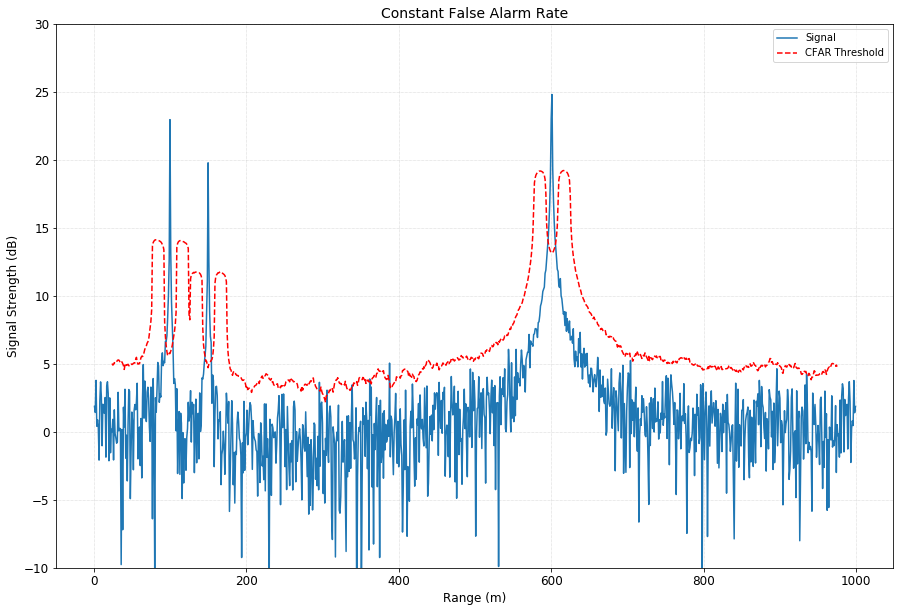

In [32]:
from matplotlib import pyplot as plt

from scipy import log10



# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.plot(10.0 * log10(signal), '', label='Signal')

plt.plot(cfar_threshold, 'r--', label='CFAR Threshold')



# Set the plot title and labels

plt.title('Constant False Alarm Rate', size=14)

plt.ylabel('Signal Strength (dB)', size=12)

plt.xlabel('Range (m)', size=12)

plt.ylim(-10, 30)



# Set the tick label size

plt.tick_params(labelsize=12)



# Set the legend

plt.legend(loc='upper right', prop={'size': 10})



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)